In [ ]:
#import important libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving electric_vehicles_spec_2025.csv.csv to electric_vehicles_spec_2025.csv.csv


In [ ]:
df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
#dropping unneccasary columns
df = df.drop(['model','battery_type','source_url','fast_charge_port'], axis=1)
df.head()

,brand,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,Abarth,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,Abarth,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,Abarth,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
3,Abarth,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
4,Aiways,150,60.0,NaN,310.0,156,315,7.5,78.0,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV


<Axes: >

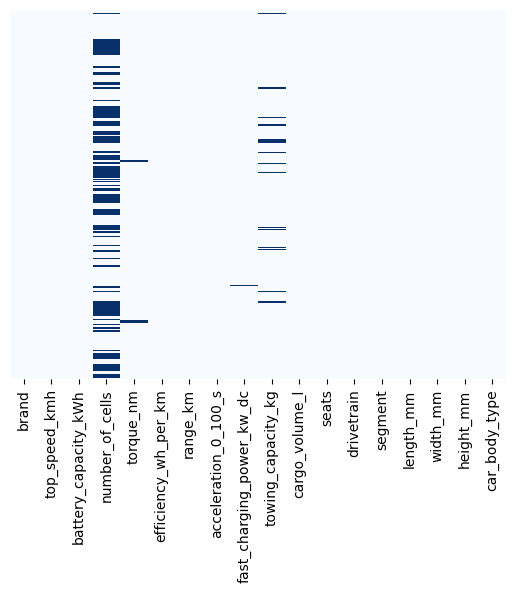

In [ ]:
#searching for empty cells
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
df.isnull().sum()

,0
brand,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0
fast_charging_power_kw_dc,1
towing_capacity_kg,26


In [ ]:
#filling cells with NaN
df = df.fillna(method='ffill')

/tmp/ipython-input-636341629.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   top_speed_kmh              478 non-null    int64  
 2   battery_capacity_kWh       478 non-null    float64
 3   number_of_cells            478 non-null    float64
 4   torque_nm                  478 non-null    float64
 5   efficiency_wh_per_km       478 non-null    int64  
 6   range_km                   478 non-null    int64  
 7   acceleration_0_100_s       478 non-null    float64
 8   fast_charging_power_kw_dc  478 non-null    float64
 9   towing_capacity_kg         478 non-null    float64
 10  cargo_volume_l             478 non-null    object 
 11  seats                      478 non-null    int64  
 12  drivetrain                 478 non-null    object 
 13  segment                    478 non-null    object 

In [ ]:
new_df = df.copy()
new_df.drop(["segment", "brand"], axis=1)

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
1,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
2,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
3,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
4,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,FWD,4680,1865,1700,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,210,71.0,110.0,440.0,148,365,6.0,240.0,2000.0,539,5,RWD,4787,1930,1650,SUV
474,190,49.0,110.0,343.0,148,265,5.9,70.0,1600.0,362,5,RWD,4432,1836,1566,SUV
475,190,65.0,110.0,343.0,146,360,5.6,114.0,1600.0,362,5,RWD,4432,1836,1566,SUV
476,190,65.0,110.0,543.0,153,350,3.8,114.0,1600.0,362,5,AWD,4432,1836,1566,SUV


In [ ]:
labels = df["segment"].values

In [ ]:
del new_df["brand"]
#del new_df["segment"]
new_df.head()


,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,1,3673,1683,1518,2
1,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,1,3673,1683,1518,2
2,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,1,4187,1779,1557,4
3,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,1,4187,1779,1557,4
4,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,1,4680,1865,1700,4


In [ ]:
#encoding str options to numbers
encoder = LabelEncoder()
new_df['drivetrain'] = encoder.fit_transform(new_df['drivetrain'])
new_df['car_body_type'] = encoder.fit_transform(new_df['car_body_type'])

In [ ]:
#convert certain cell to str
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('10 Banana Boxes', '511')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('13 Banana Boxes', '645')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('31 Banana Boxes', '500')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].astype(int)

In [ ]:
new_df.head()

,brand,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,length_mm,width_mm,height_mm,car_body_type
0,Abarth,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,1,3673,1683,1518,2
1,Abarth,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,1,3673,1683,1518,2
2,Abarth,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,1,4187,1779,1557,4
3,Abarth,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,1,4187,1779,1557,4
4,Aiways,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,1,4680,1865,1700,4


In [ ]:
#convesrt to numpy array
X = new_df.values

In [ ]:
#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42)

In [ ]:
X_embedded = tsne.fit_transform(X_scaled)

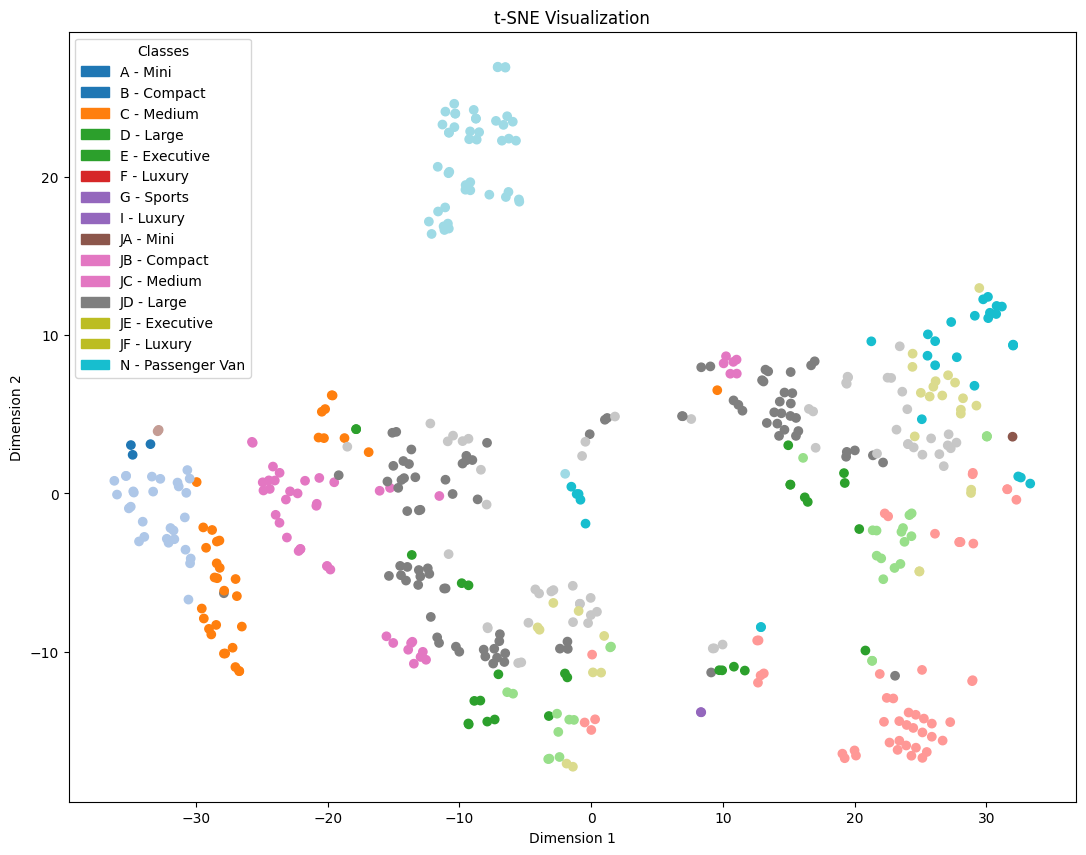

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.patches as mpatches

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)


plt.figure(figsize=(13,10))
scatter_plot = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=encoded_labels, cmap='tab20')
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
handles = [mpatches.Patch(color=plt.cm.tab10(i/len(encoder.classes_)),
                          label=cls)
           for i, cls in enumerate(encoder.classes_)]

plt.legend(handles=handles, title="Classes")
plt.savefig("tsne_plot_30.pdf")
plt.show()
files.download("tsne_plot_30.pdf")

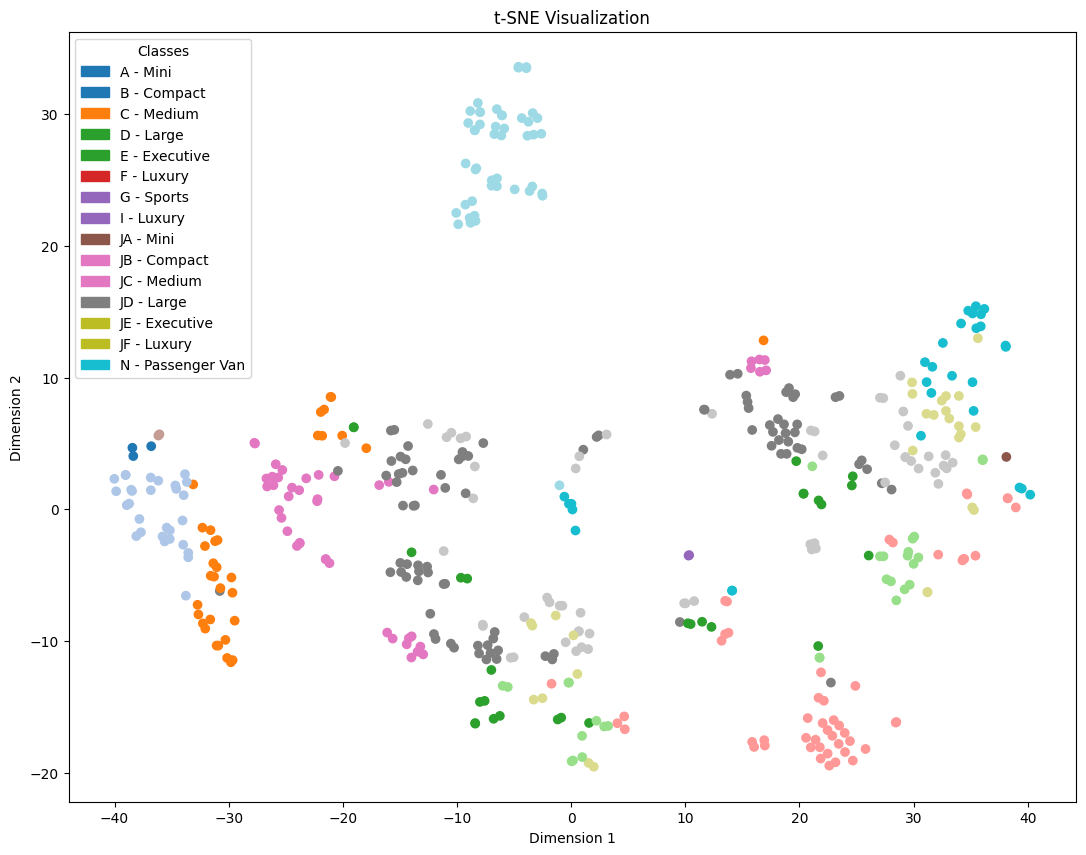

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.patches as mpatches

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)


plt.figure(figsize=(13,10))
scatter_plot = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=encoded_labels, cmap='tab20')
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
handles = [mpatches.Patch(color=plt.cm.tab10(i/len(encoder.classes_)),
                          label=cls)
           for i, cls in enumerate(encoder.classes_)]

plt.legend(handles=handles, title="Classes")
plt.show()
plt.savefig("tsne_plot_25.pdf")
files.download("tsne_plot_25.pdf")

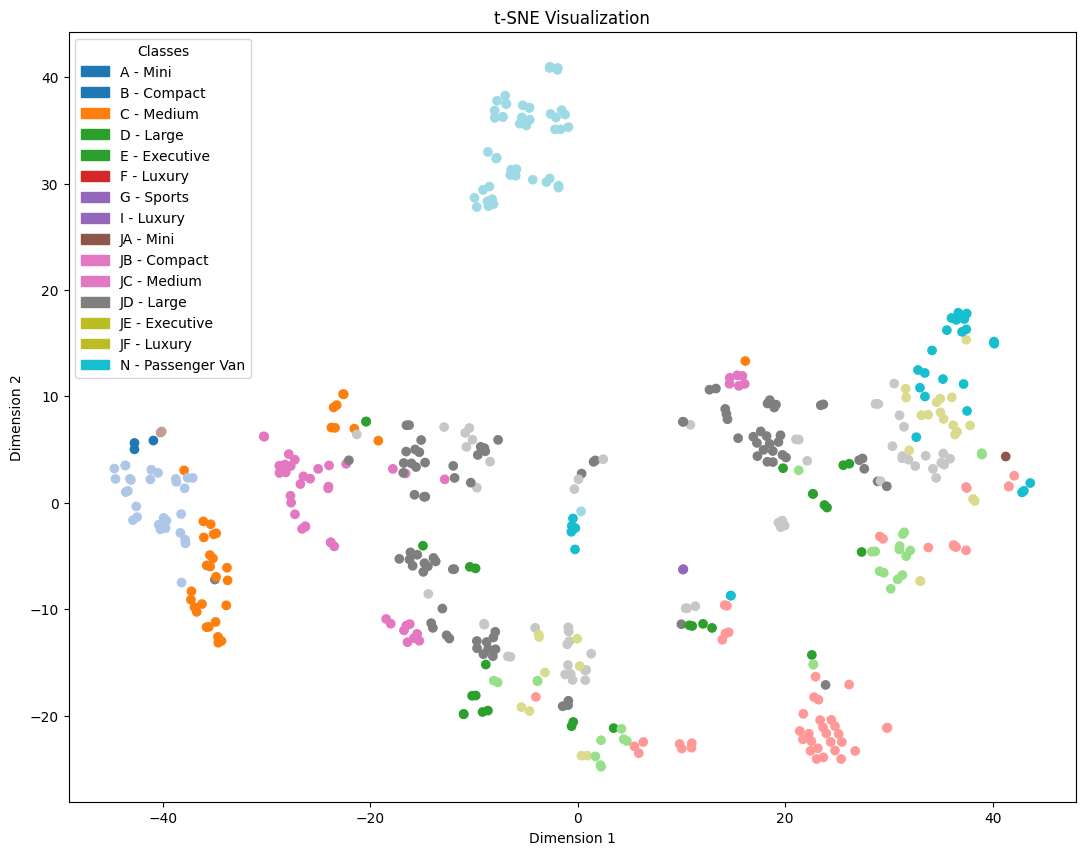

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.patches as mpatches

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)


plt.figure(figsize=(13,10))
scatter_plot = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=encoded_labels, cmap='tab20')
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
handles = [mpatches.Patch(color=plt.cm.tab10(i/len(encoder.classes_)),
                          label=cls)
           for i, cls in enumerate(encoder.classes_)]

plt.legend(handles=handles, title="Classes")
plt.show()
plt.savefig("tsne_plot_20.pdf")
files.download("tsne_plot_20.pdf")

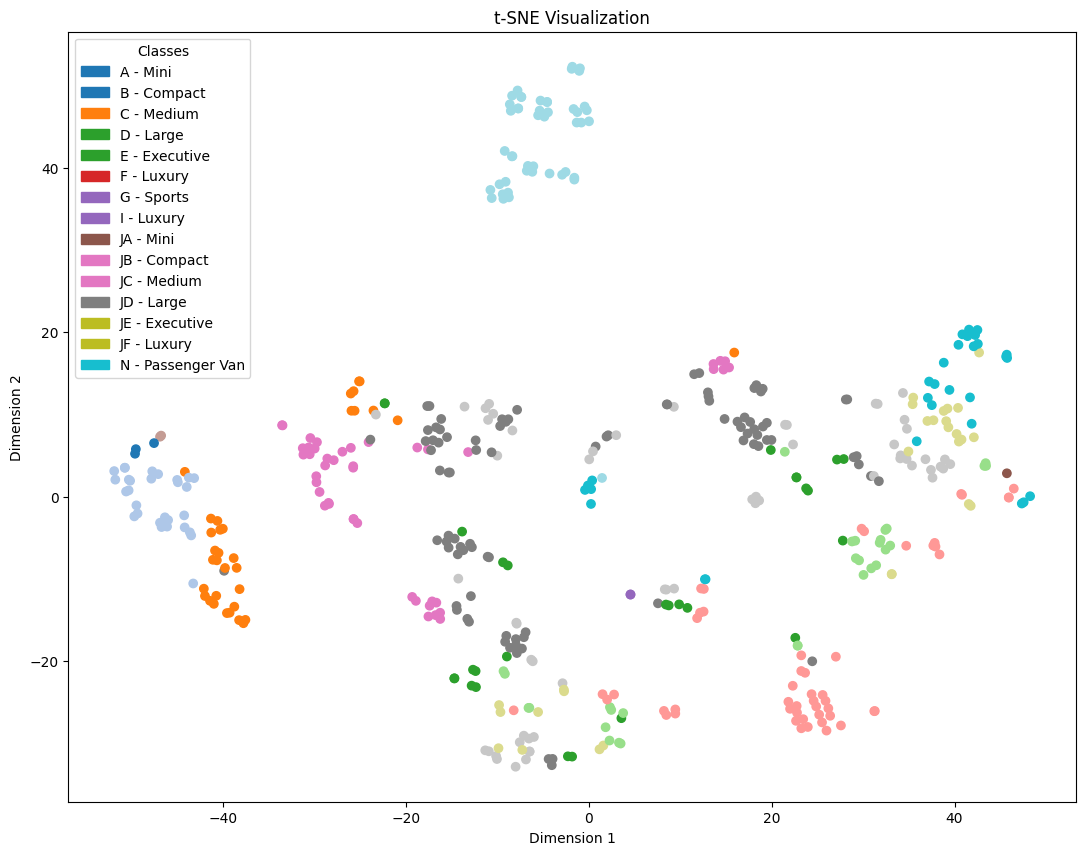

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.patches as mpatches

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)


plt.figure(figsize=(13,10))
scatter_plot = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=encoded_labels, cmap='tab20')
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
handles = [mpatches.Patch(color=plt.cm.tab10(i/len(encoder.classes_)),
                          label=cls)
           for i, cls in enumerate(encoder.classes_)]

plt.legend(handles=handles, title="Classes")
plt.show()
plt.savefig("tsne_plot_15.pdf")
files.download("tsne_plot_15.pdf")